In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
df = pd.read_excel('hsa2023_max.xlsx')

# I. Thống kê dữ liệu


In [3]:
df.head()

,STT,Giới tính,Tỉnh,Trường THPT,HSA1,HSA2,HSA3,HSA
0,1,FEMALE,Thành phố Hà Nội,THPT Đào Duy Từ,33,34,20,85
1,2,MALE,Cộng Hoà Séc,THPT Trần Hưng Đạo-Thanh Xuân,23,29,21,73
2,3,MALE,Cộng Hoà Séc,THPT Trần Hưng Đạo-Thanh Xuân,38,34,31,96
3,4,MALE,"Prachatice, Cộng Hoà Séc",THCS&THPT Việt Úc Hà Nội,22,22,16,60
4,5,MALE,Thành phố Hà Nội,THPT Đoàn Kết-Hai Bà Trưng,9,33,30,72


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59528 entries, 0 to 59527
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   STT          59528 non-null  int64 
 1   Giới tính    59528 non-null  object
 2   Tỉnh         59528 non-null  object
 3   Trường THPT  59528 non-null  object
 4   HSA1         59528 non-null  int64 
 5   HSA2         59528 non-null  int64 
 6   HSA3         59528 non-null  int64 
 7   HSA          59528 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 3.6+ MB


In [5]:
df.describe()

,STT,HSA1,HSA2,HSA3,HSA
count,59528.000000,59528.000000,59528.000000,59528.000000,59528.000000
mean,29764.500000,26.890472,30.187828,21.793828,77.741433
std,17184.397749,8.163465,4.809630,5.323857,14.299689
min,1.000000,3.000000,0.000000,0.000000,24.000000
25%,14882.750000,21.000000,27.000000,18.000000,67.000000
50%,29764.500000,27.000000,30.000000,21.000000,77.000000
75%,44646.250000,33.000000,34.000000,25.000000,88.000000
max,59528.000000,50.000000,46.000000,45.000000,133.000000


In [8]:
gender_counts = df["Giới tính"].value_counts()
print(gender_counts)

FEMALE    33207
MALE      26321
Name: Giới tính, dtype: int64


# II. Trực quan hóa dữ liệu

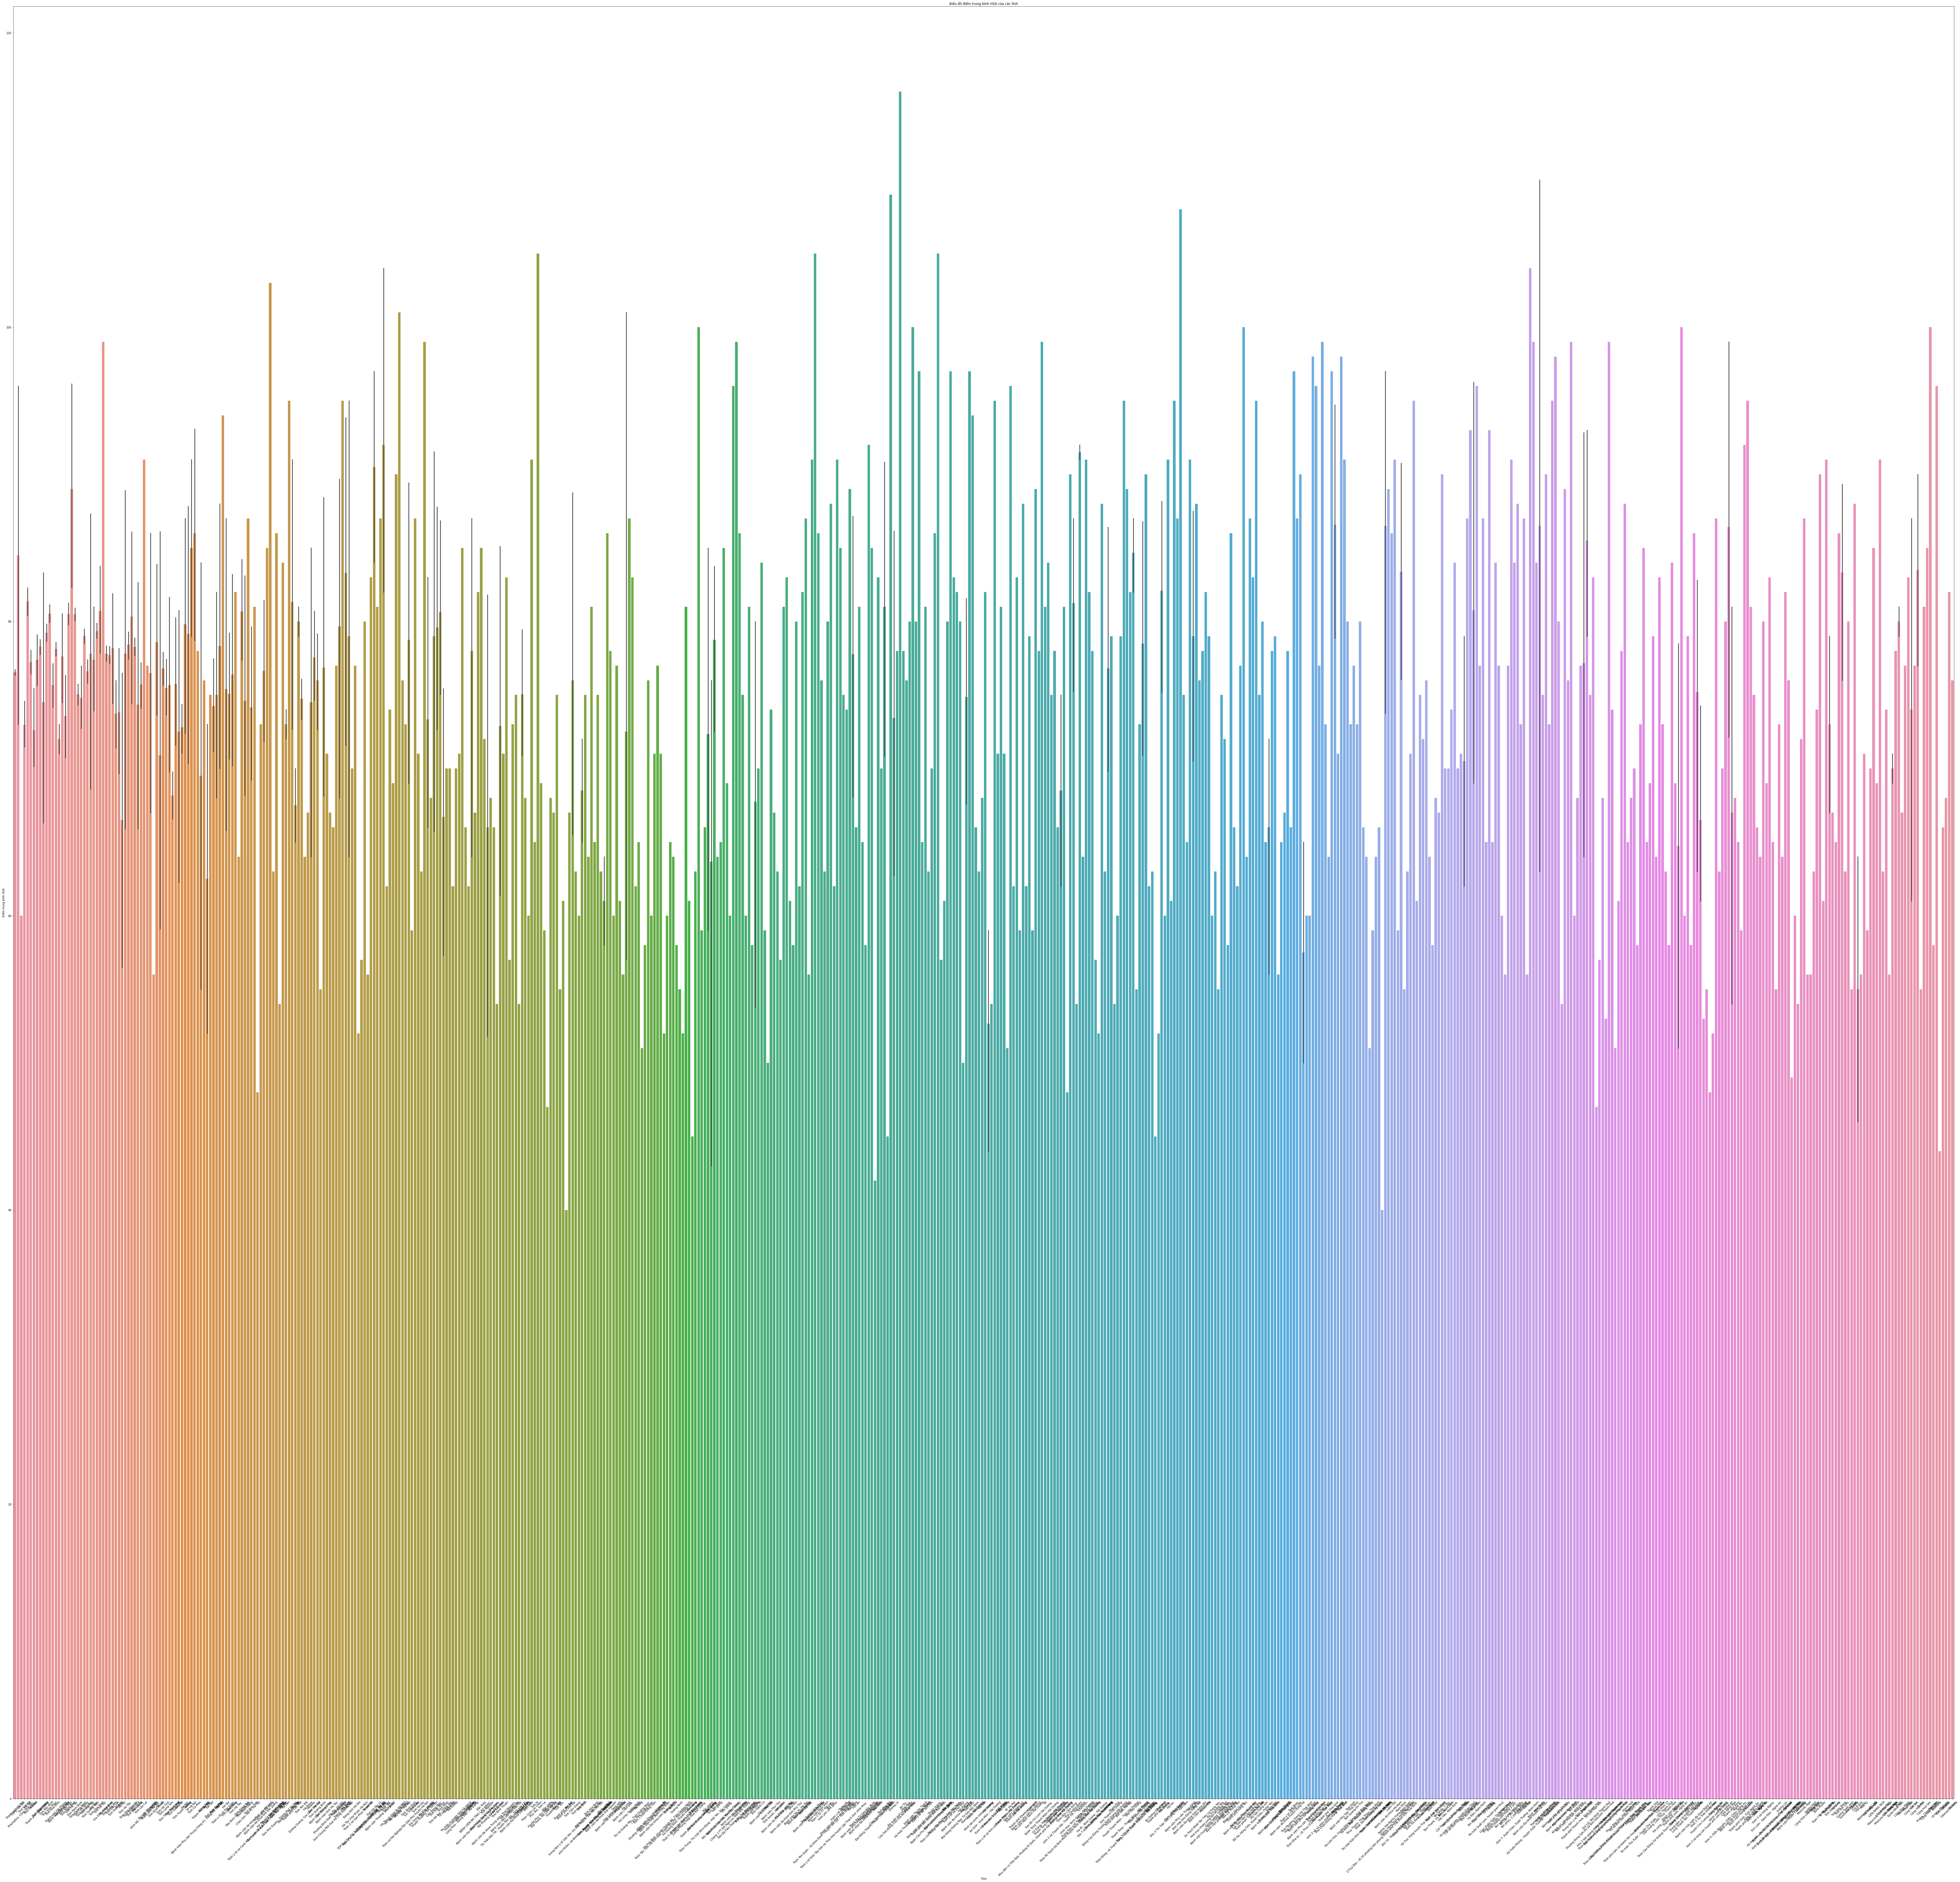

In [14]:
plt.figure(figsize=(100, 96))
sns.barplot(x='Tỉnh', y='HSA', data=df)
plt.title('Biểu đồ điểm trung bình HSA của các tỉnh')
plt.xlabel('Tỉnh')
plt.ylabel('Điểm trung bình HSA')

In [15]:
top_10_tinh = df['Tỉnh'].value_counts().nlargest(10)

Text(0, 0.5, 'Số lượng thí sinh')

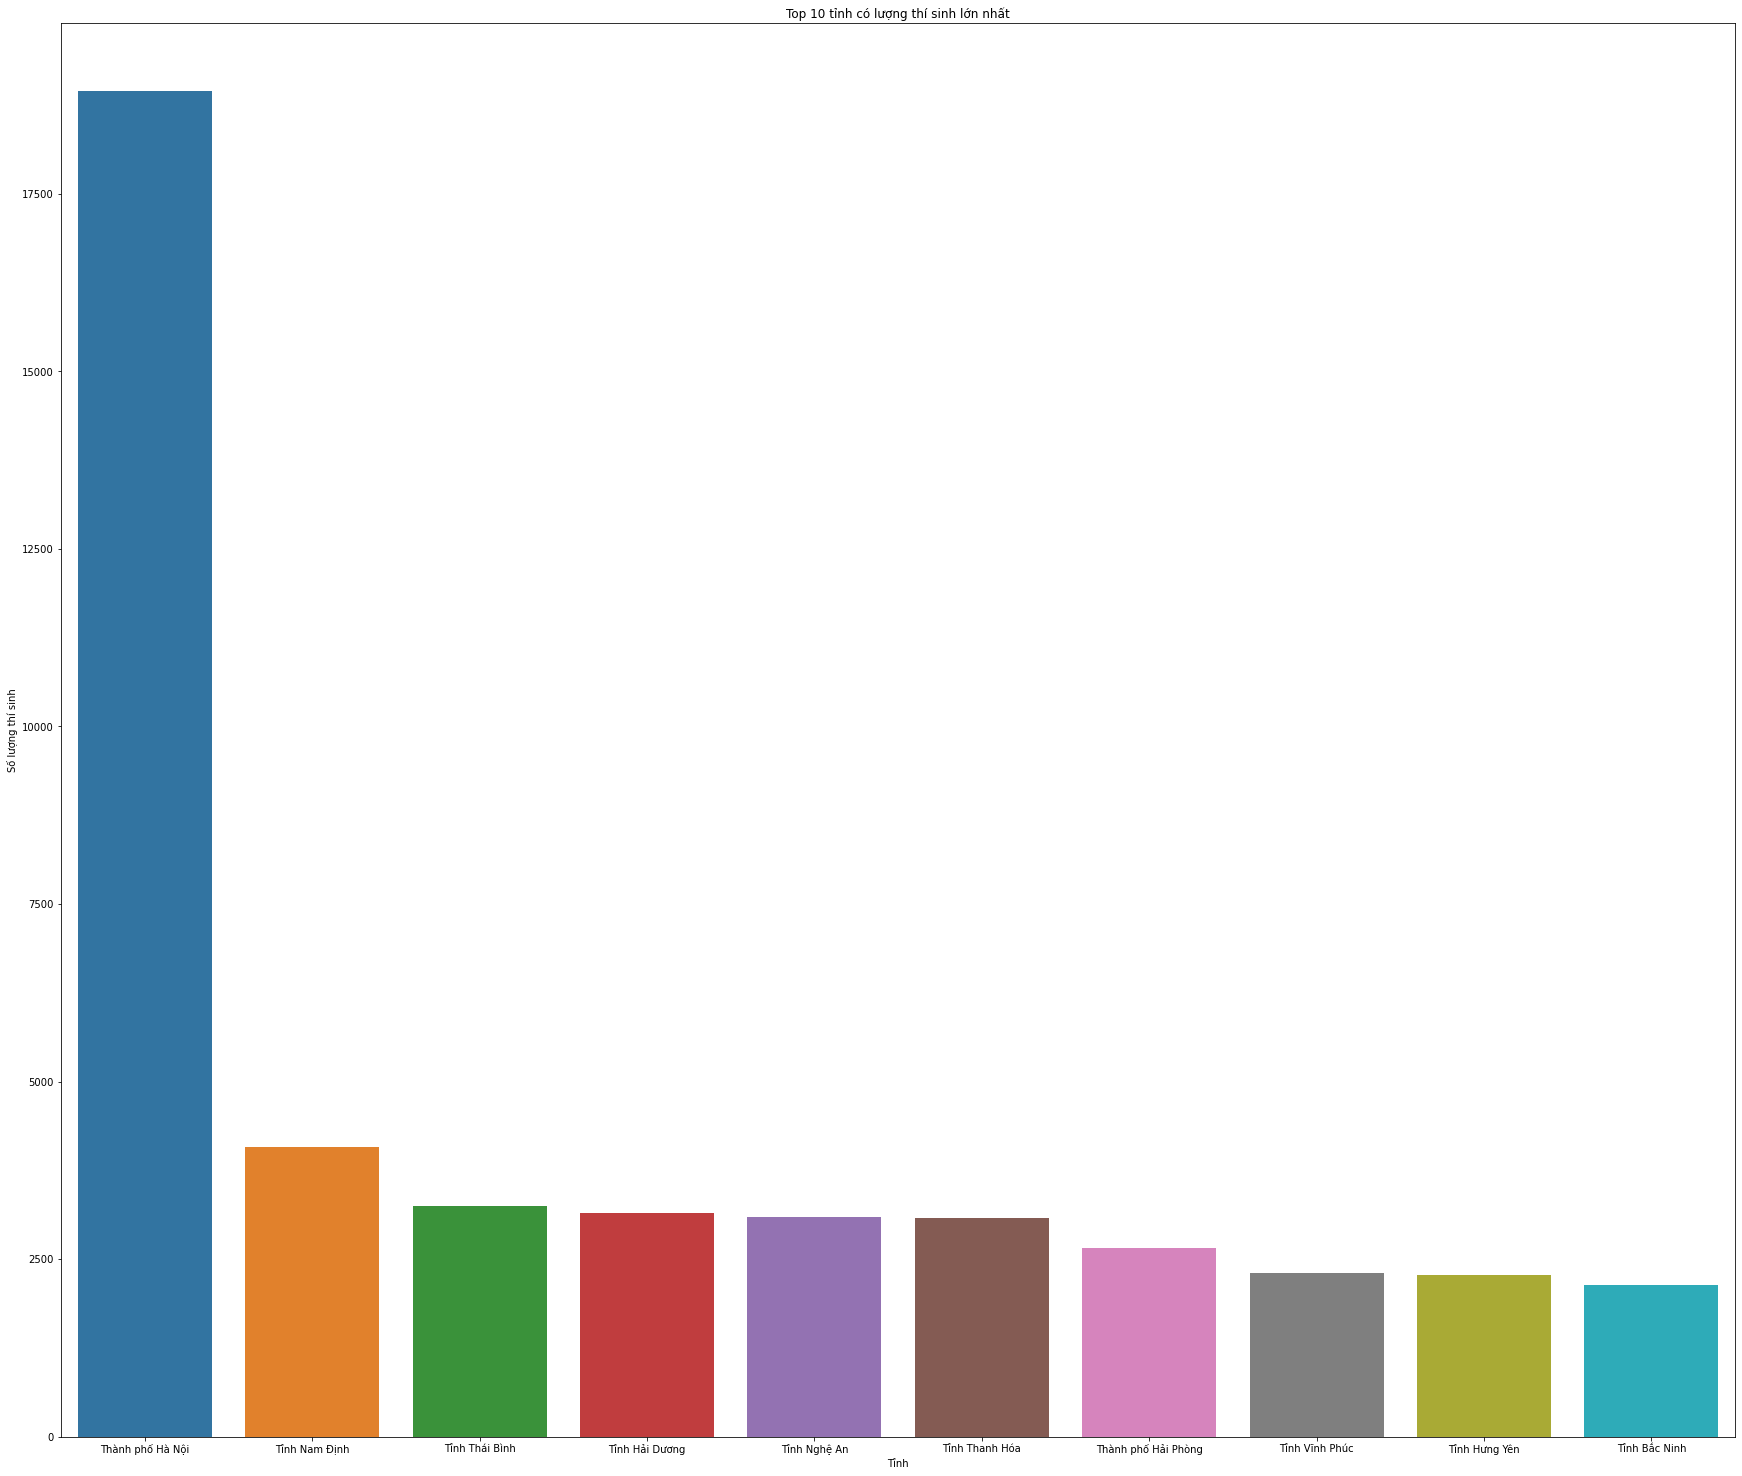

In [17]:
plt.figure(figsize=(30, 26))
sns.barplot(x=top_10_tinh.index, y=top_10_tinh.values)
plt.title("Top 10 tỉnh có lượng thí sinh lớn nhất")
plt.xlabel("Tỉnh")
plt.ylabel("Số lượng thí sinh")

In [18]:
tinh_counts = df['Tỉnh'].value_counts()

In [19]:
top_tinh = tinh_counts[tinh_counts > 1000]

Text(0, 0.5, 'Số lượng thí sinh')

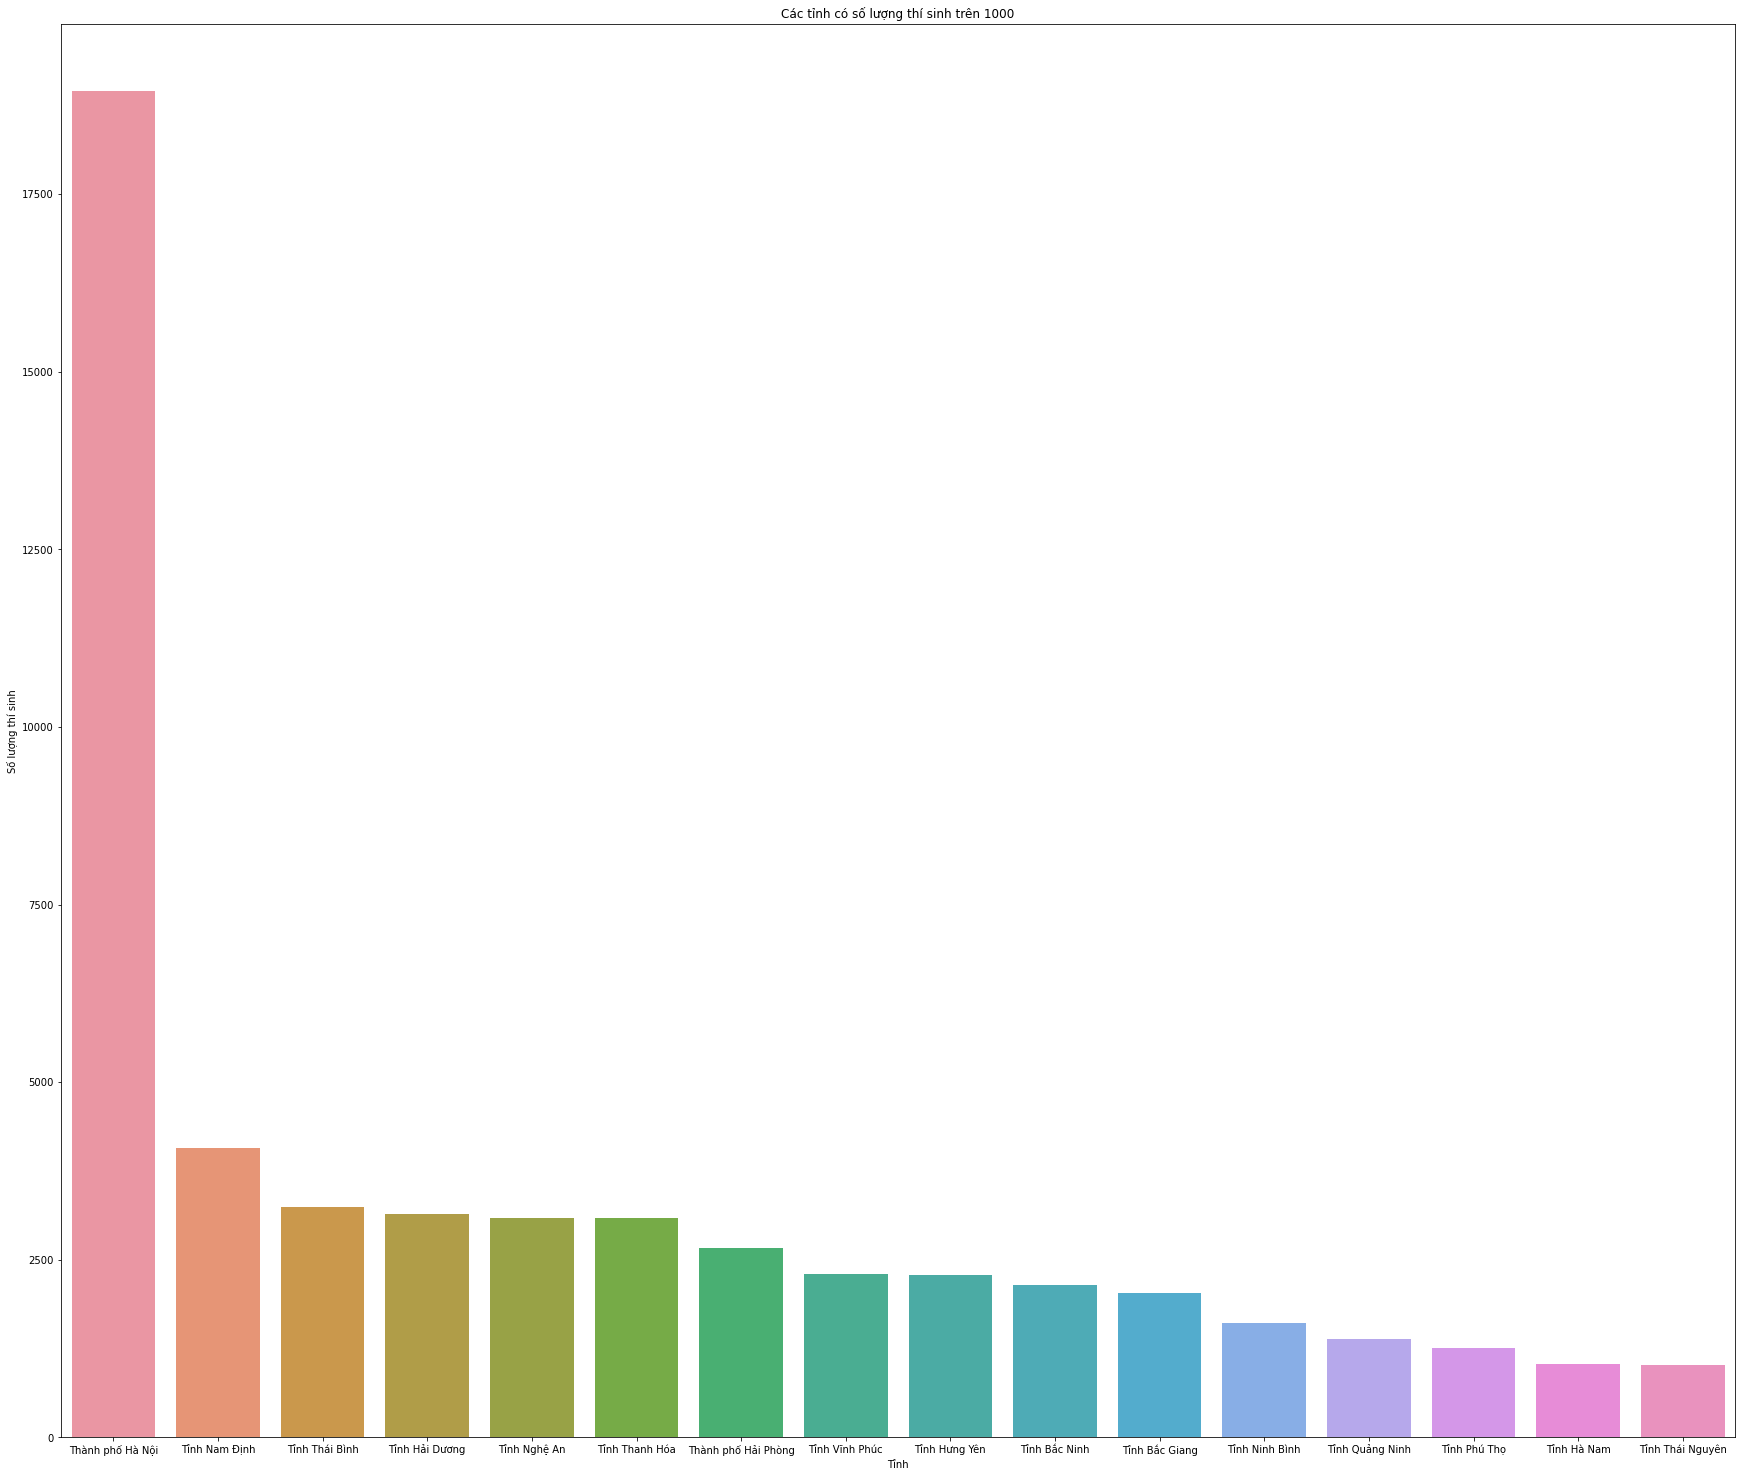

In [20]:
plt.figure(figsize=(30, 26))
sns.barplot(x=top_tinh.index, y=top_tinh.values)
plt.title("Các tỉnh có số lượng thí sinh trên 1000")
plt.xlabel("Tỉnh")
plt.ylabel("Số lượng thí sinh")

In [22]:
filtered_df = df[df['Tỉnh'].isin(['Hà Nội', 'Nam Định', 'Thái Bình', 'Hải Dương', 'Hải Phòng'])]

In [23]:
top_10_truong = filtered_df['Trường THPT'].value_counts().nlargest(10)

Text(0, 0.5, 'Trường THPT')

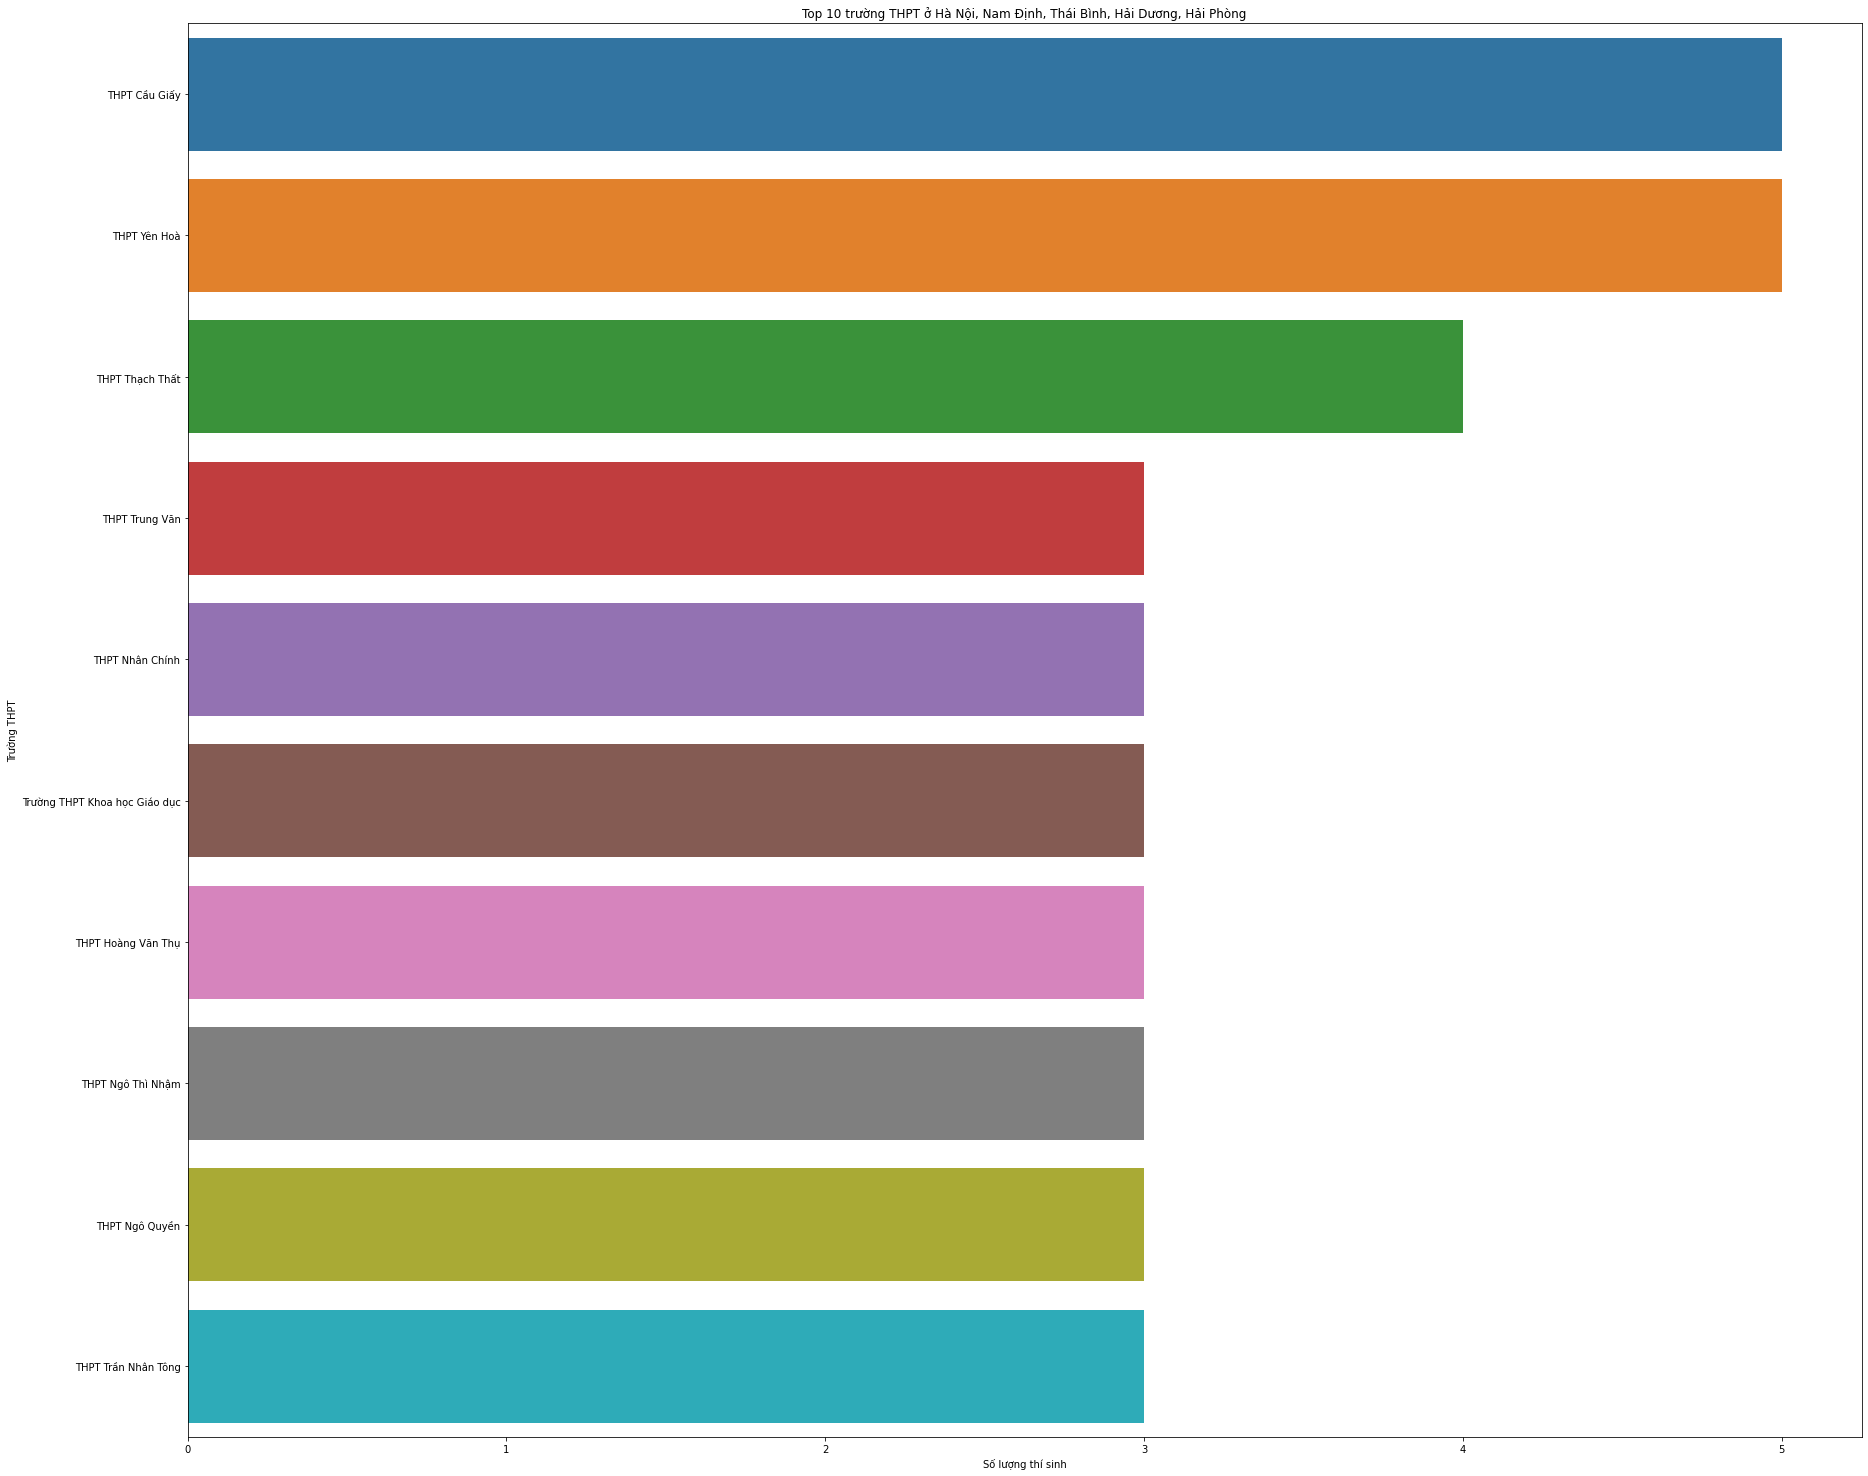

In [26]:
plt.figure(figsize=(30, 26))
sns.barplot(x=top_10_truong.values, y=top_10_truong.index)
plt.title("Top 10 trường THPT ở Hà Nội, Nam Định, Thái Bình, Hải Dương, Hải Phòng")
plt.xlabel("Số lượng thí sinh")
plt.ylabel("Trường THPT")

In [30]:
thpt_counts = df['Trường THPT'].value_counts()

In [31]:
filtered_df = df[df['Trường THPT'].isin(thpt_counts[thpt_counts > 300].index)]

In [45]:
top_truong = filtered_df['Trường THPT'].value_counts()

Text(0, 0.5, 'Trường THPT')

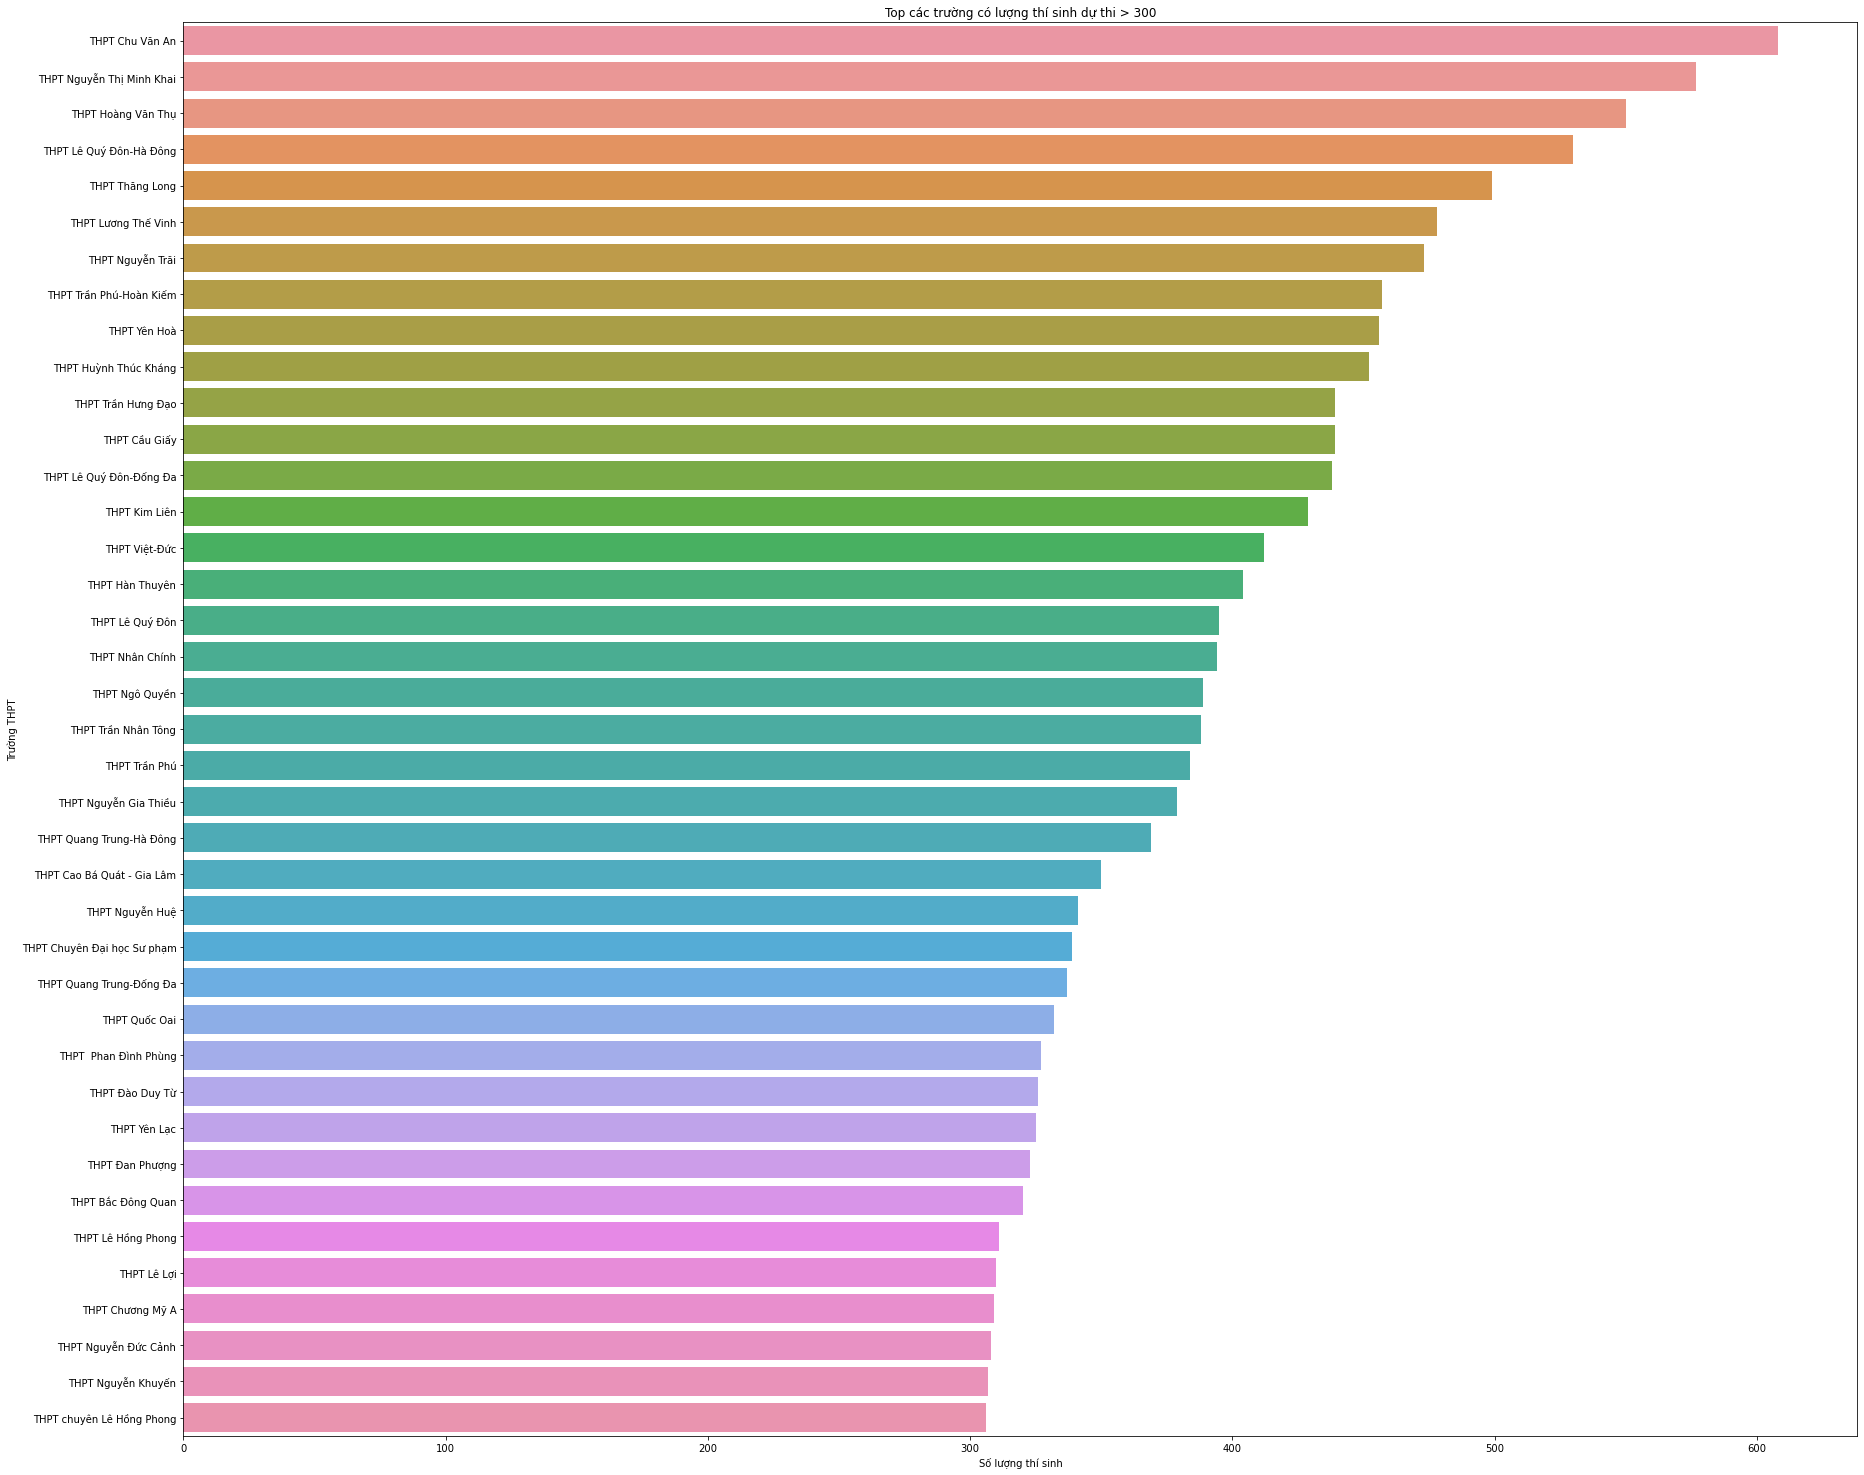

In [46]:
plt.figure(figsize=(30, 26))
sns.barplot(x=top_truong.values, y=top_truong.index)
plt.title("Top các trường có lượng thí sinh dự thi > 300")
plt.xlabel("Số lượng thí sinh")
plt.ylabel("Trường THPT")

In [54]:
sorted = df.sort(by='HSA', ascending=False)

In [55]:
top_10_tinh = sorted.head(10)

Text(0, 0.5, 'Tỉnh')

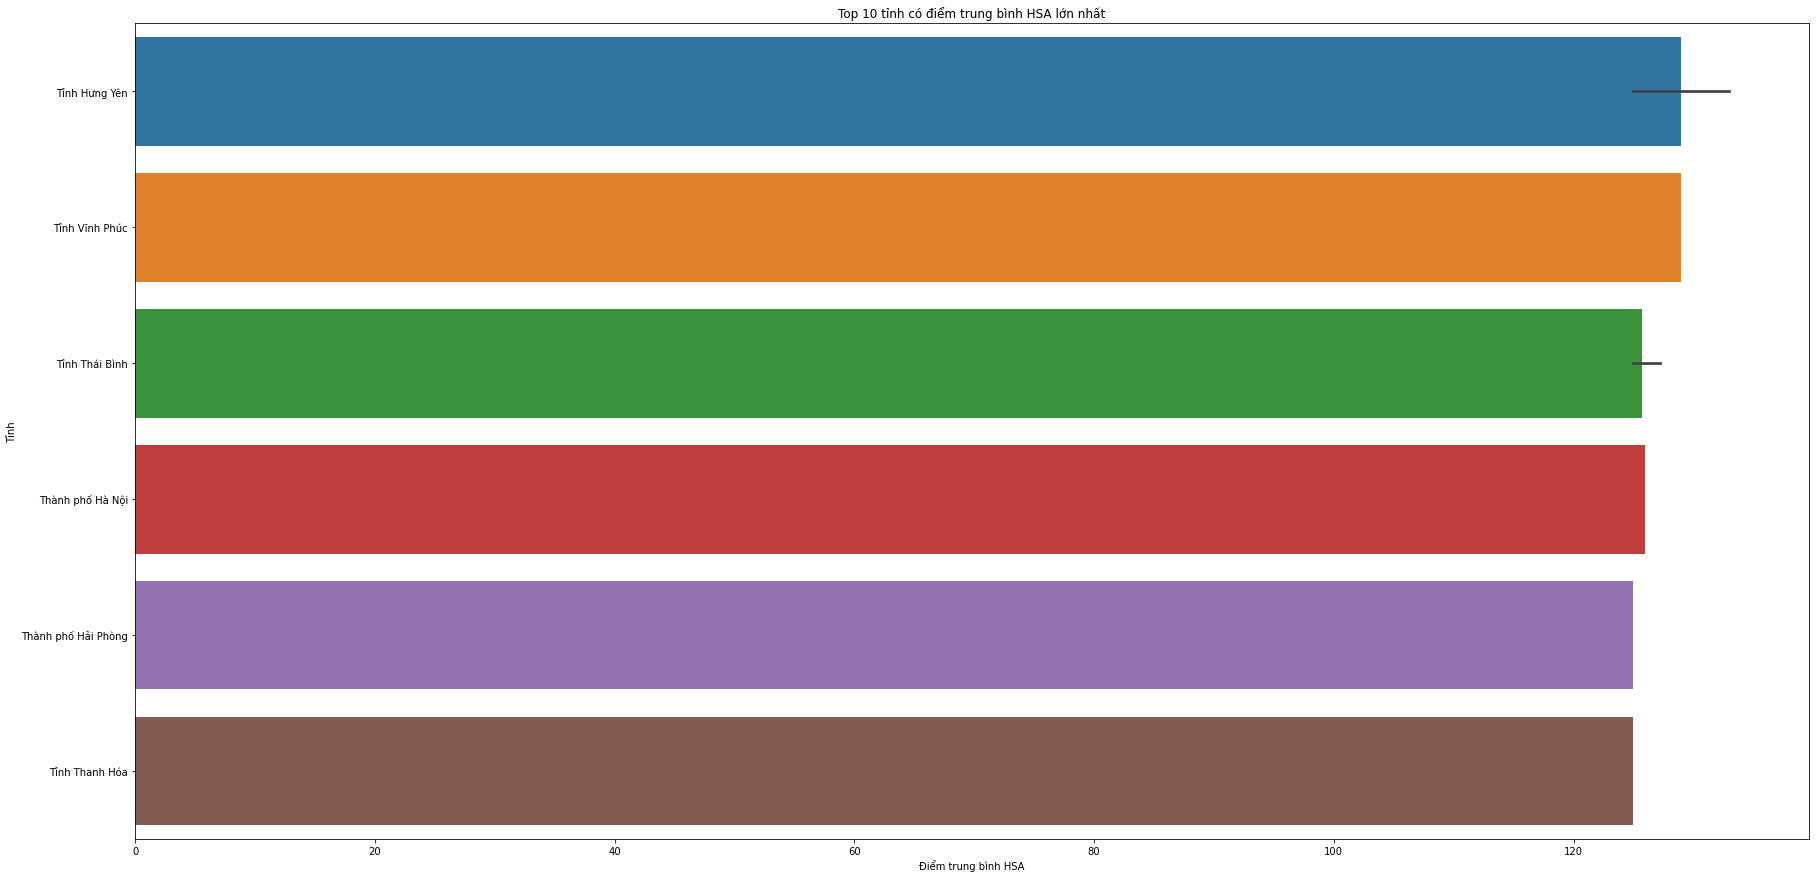

In [60]:
plt.figure(figsize=(30, 15))
sns.barplot(x='HSA', y='Tỉnh', data=top_10_tinh)
plt.title('Top 10 tỉnh có điểm trung bình HSA lớn nhất')
plt.xlabel('Điểm trung bình HSA')
plt.ylabel('Tỉnh')